<a href="https://colab.research.google.com/github/anushka827/MAJOR-PROJECT---1/blob/main/main-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard_2023.csv')

# Check for missing values
print(df.isnull().sum())

# Drop rows where 'Class' is NaN
df = df.dropna(subset=['Class'])

# Confirm removal
print(df.isnull().sum())

# Check class distribution
print(df['Class'].value_counts())

# Features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       1
V18       1
V19       1
V20       1
V21       1
V22       2
V23       2
V24       2
V25       2
V26       2
V27       2
V28       2
Amount    2
Class     2
dtype: int64
id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0.0    3670
1.0      12
Name: count, dtype: int64
Train shape: (2945, 30)
Test shape: (737, 30)


In [2]:
# Using SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Class
0.0    2935
1.0      10
Name: count, dtype: int64
After SMOTE: Class
0.0    2935
1.0    2935
Name: count, dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

y_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9986431478968792
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       0.67      1.00      0.80         2

    accuracy                           1.00       737
   macro avg       0.83      1.00      0.90       737
weighted avg       1.00      1.00      1.00       737



In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737



In [5]:
!pip install xgboost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737



In [6]:
import joblib

# Save the model
joblib.dump(xgb_model, 'credit_card_fraud_model.pkl')

# To load later:
# loaded_model = joblib.load('credit_card_fraud_model.pkl')
# loaded_model.predict(X_test)


['credit_card_fraud_model.pkl']

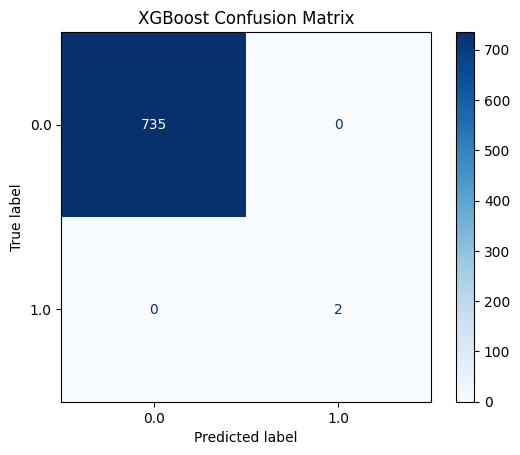

In [8]:
# Import missing library
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix for XGBoost predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues')

plt.title("XGBoost Confusion Matrix")
plt.show()
